In [16]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            np.random.seed(random_state)
        
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1]) # 1 is the bias
        self.errors_ = []
        
        # update for n iteration
        for _ in range(self.n_iter):
            # change the order of features and labels
            if self.shuffle:
                X,y = self._shuffle(X,y)
            errors = 0
            for xi, target in zip(X,y):
                # delta = difference = update 
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update # bias doesn't need to multiply xi in backprop
                self.w_[1:] += update * xi # weights backprop
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        # shuffle the order of a list
        return X[r], y[r]
    
    
    def net_input(self, X):
         # wx + b
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        # if net_input > 0 return 1 
        # else -1

In [17]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Plotting the iris data

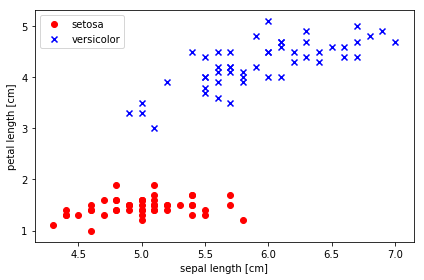

In [18]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# first 100 row, 4 columns
y = df.iloc[0:100, 4].values
# setosa = -1
y = np.where(y == 'Iris-setosa', -1, 1)

# 100 rows, column 0 & 2
X = df.iloc[0:100, [0,2]].values


# 0 to 50 setosa
# 50 to 100 versicolor

# sepal length, petal length
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# automatically adjusts subplot params 
plt.tight_layout()
plt.show()

# Train the perceptron model

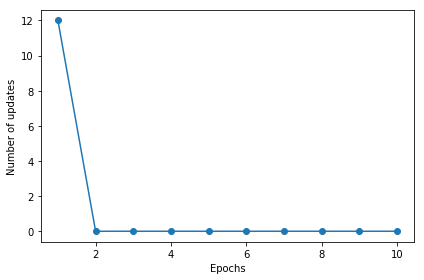

In [36]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
plt.show()

# Function to plot decision regions

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Colormap object generated from a list of colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    # find out limit of x1 and x2 axis
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()+1
    # Make coordinates
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    

    # ravel = 1d array copy
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # (1) to (x1,x2)
    Z = Z.reshape(xx1.shape)
    #  draw contours lines and filled contours
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        # plot unique x, y
        # alpha = opaque
        # edgecolor = marker edge
        # label = markers for each point
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c = cmap(idx),
                    edgecolor = 'black',
                    marker = markers[idx],
                    label=cl)

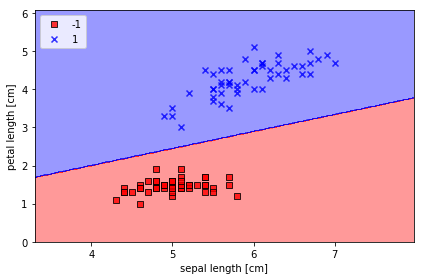

In [33]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [37]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
             
    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1]) 
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # Linear neuron, can change to sigmoid
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

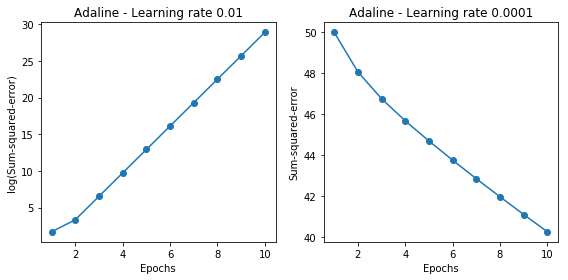

In [47]:
# (8,4) = x, y
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# train for 10 iteration
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
# plot x y simultaneously
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')


ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

# Slower learning rate to reach global cost minimum

In [48]:
# standardize features
X_std = np.copy(X)
# (point - mean) / std
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

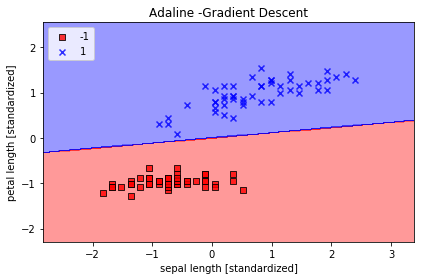

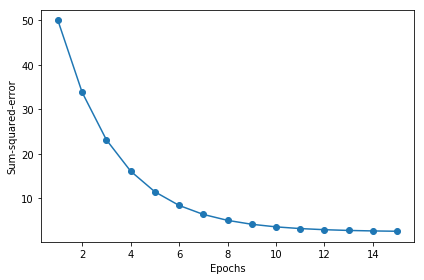

In [49]:
ada = AdalineGD(n_iter = 15, eta=0.01)
ada.fit(X_std, y)

# Plot blue red graph
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline -Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# plot the cost
# standardized position = not std position
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# Large scale machine learning and stochastic gradient descent

In [53]:
from numpy.random import seed

class AdalineSGD(object):

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        self._initalize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X, y):
                # the output of update weight to cost
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    
    def partial_fit(self, X, y):
        '''Fit training data without reinitializing the weights'''
        if not self.w_initialized:
            self._initalize_weights(X.shape[1])
        # if more than 1 input
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    # Create weight vector and turn w_initalized to True
    def _initalize_weights(self,m):
        self.w_ = np.zeros(1+m)
        self.w_initalized = True
    
    # backprop
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

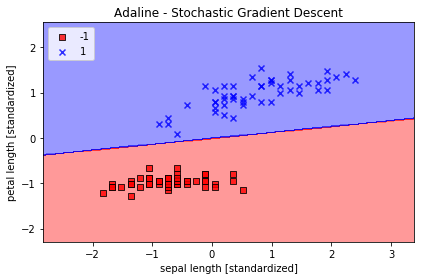

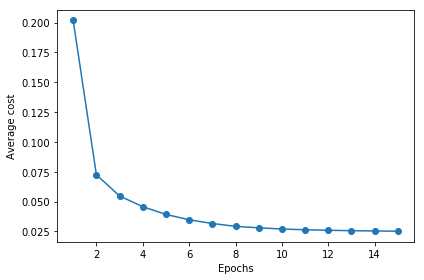

In [55]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# cost_ in fit
# x, y
plt.plot(range(1, len(ada.cost_) +1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.tight_layout()
plt.show()

In [60]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # logistic cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        # logistic regression labels 0 / 1
        # threshold changes from 0.0 to 0.5
        return np.where(self.activation(X) >= 0.5, 1, 0)
    
    def activation(self, X):
        z = self.net_input(X)
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        return sigmoid

In [61]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

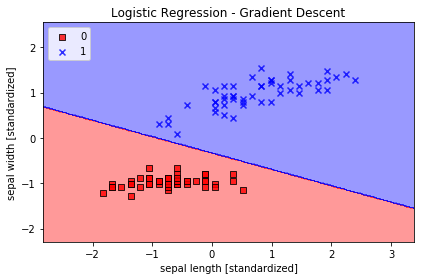

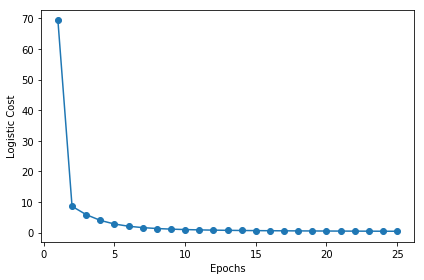

In [62]:
lr = LogisticRegressionGD(n_iter=25, eta=0.15)
lr.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()